In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn

In [4]:
df_data = pd.read_csv("../MSDS_Capstone/summed_total.csv")
df_data2 = pd.read_csv("../MSDS_Capstone/summed_total.csv")

In [5]:
df_data2["imd_band"] = df_data2["imd_band"].replace("10-20","10-20%")

In [6]:
df_data2["imd_band"].value_counts()
df_data2["imd_band"].count()

29228

In [7]:
1054/29288

0.035987435127014474

In [8]:
df_data.head()

,id_student,code_module,code_presentation,sum_click,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,6516,AAA,2014J,2791,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass
1,8462,DDD,2013J,646,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn
2,8462,DDD,2014J,10,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn
3,11391,AAA,2013J,934,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
4,23629,BBB,2013B,161,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail


In [9]:
df_data["imd_band"] = df_data["imd_band"].replace("10-20","10-20%")

In [10]:
df_data["imd_band"].value_counts()

imd_band
20-30%     3205
30-40%     3193
10-20%     3038
40-50%     2915
50-60%     2850
0-10%      2829
60-70%     2658
70-80%     2628
80-90%     2507
90-100%    2351
?          1054
Name: count, dtype: int64

Text(0, 0.5, 'No of instances')

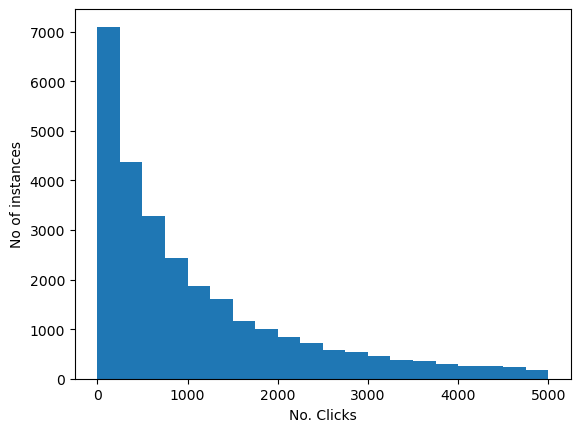

In [11]:
plt.hist(df_data["sum_click"],bins=20,range=(0,5000))
plt.xlabel("No. Clicks", fontsize=10)  
plt.ylabel("No of instances", fontsize=10)

In [12]:
df_data["final_result"].value_counts()

final_result
Pass           12358
Withdrawn       7168
Fail            6678
Distinction     3024
Name: count, dtype: int64

[Text(0.5, 0, 'Result'), Text(0, 0.5, ' Total Interactions')]

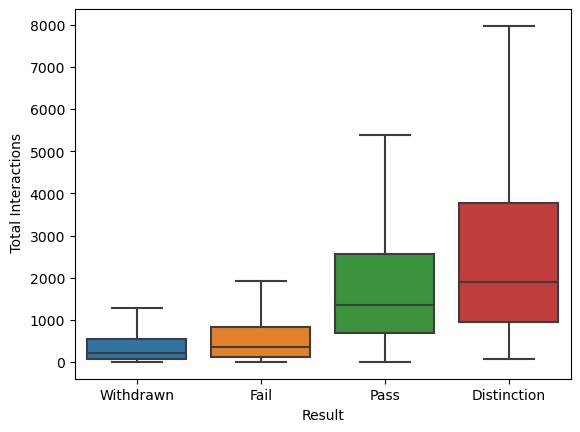

In [13]:
sns.boxplot(x = 'final_result', y = 'sum_click', data = df_data,showfliers=False, order = ["Withdrawn","Fail","Pass","Distinction"]).set(xlabel="Result" , ylabel=" Total Interactions")

<Axes: xlabel='final_result', ylabel='sum_click'>

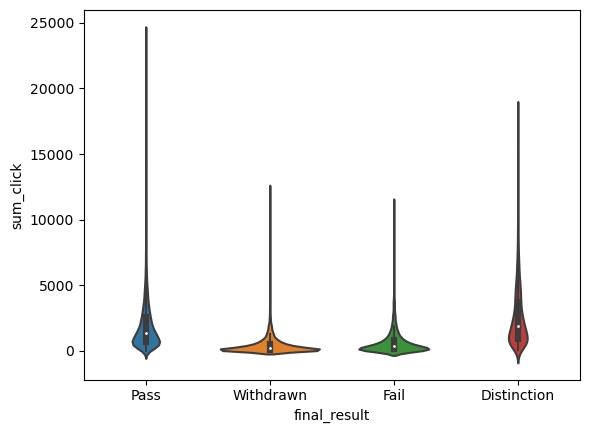

In [14]:
sns.violinplot(x = 'final_result', y = 'sum_click', data = df_data)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

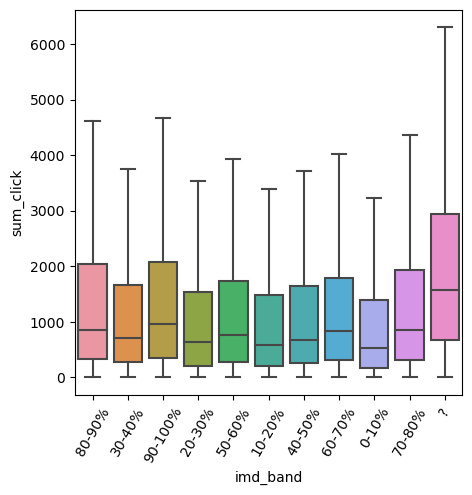

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x = 'imd_band', y = 'sum_click', data = df_data,showfliers=False)
plt.setp(ax.get_xticklabels(), rotation=60)

<Axes: ylabel='count'>

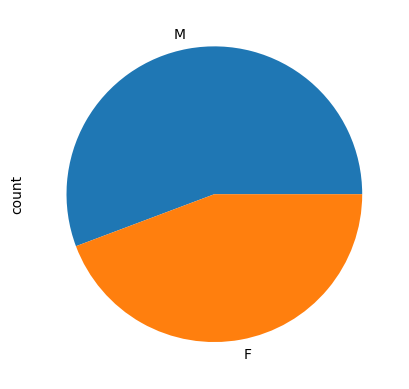

In [16]:
df_data["gender"].value_counts(dropna=False).plot(kind="pie")

<Axes: xlabel='gender', ylabel='sum_click'>

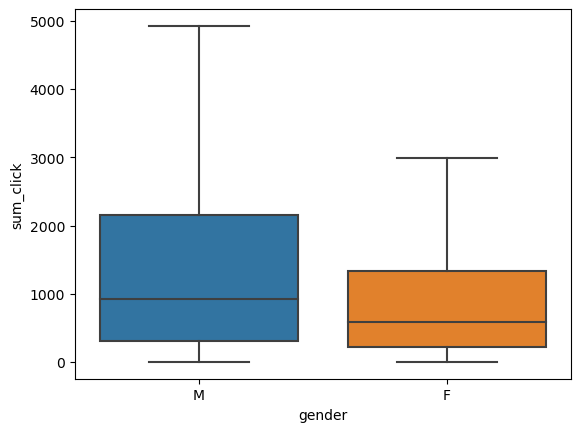

In [17]:
sns.boxplot(x = 'gender', y = 'sum_click', data = df_data,showfliers=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Scotland'),
  Text(1, 0, 'London Region'),
  Text(2, 0, 'East Anglian Region'),
  Text(3, 0, 'Wales'),
  Text(4, 0, 'Yorkshire Region'),
  Text(5, 0, 'East Midlands Region'),
  Text(6, 0, 'South Region'),
  Text(7, 0, 'North Western Region'),
  Text(8, 0, 'South East Region'),
  Text(9, 0, 'South West Region'),
  Text(10, 0, 'West Midlands Region'),
  Text(11, 0, 'North Region'),
  Text(12, 0, 'Ireland')])

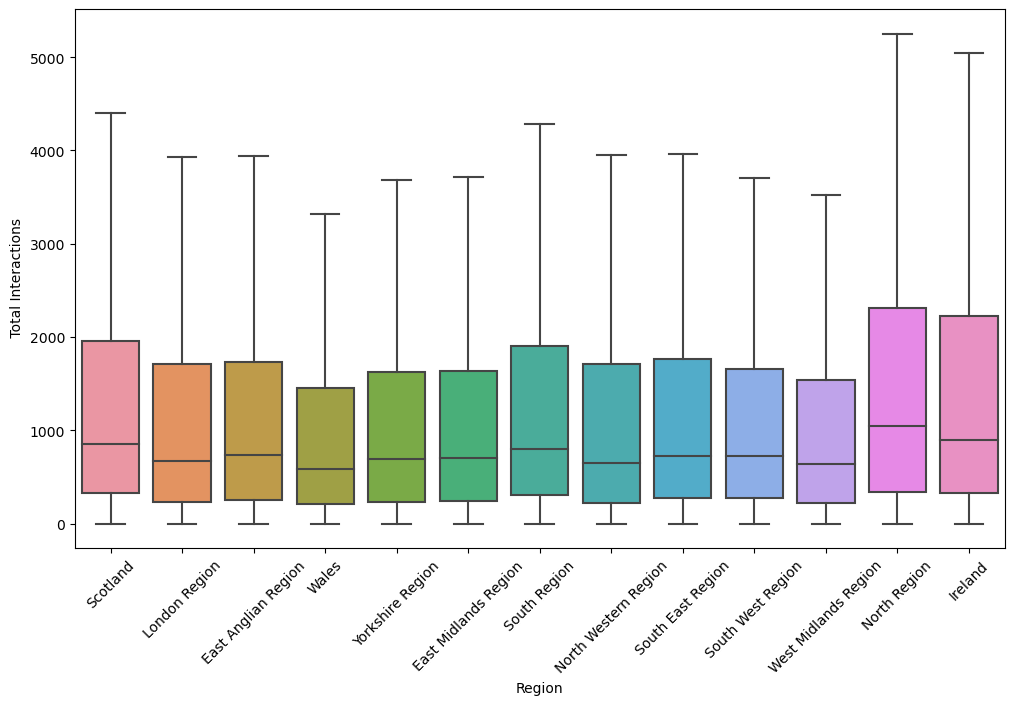

In [18]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.boxplot(x = 'region', y = 'sum_click', data = df_data,showfliers=False).set(xlabel="Region" , ylabel=" Total Interactions")
plt.xticks(rotation = 45)

In [19]:
df_data[['region','sum_click']].groupby("region").describe()

sum_click                                                 \
                         count         mean          std  min     25%     50%   
region                                                                          
East Anglian Region     2988.0  1323.747323  1640.210305  1.0  253.00   738.5   
East Midlands Region    2074.0  1259.874156  1567.197317  1.0  247.25   699.0   
Ireland                 1112.0  1578.836331  1823.006965  1.0  325.50   895.0   
London Region           2814.0  1325.894812  1799.729111  1.0  228.25   669.0   
North Region            1641.0  1642.808653  1902.902694  1.0  336.00  1047.0   
North Western Region    2522.0  1293.681998  1719.670182  1.0  217.00   646.5   
Scotland                3179.0  1503.943064  1858.893982  1.0  324.00   859.0   
South East Region       1900.0  1371.520000  1767.007874  1.0  275.00   730.5   
South Region            2803.0  1451.408491  1817.815548  1.0  307.00   801.0   
South West Region       2196.0  1317.205373  1736.369062  1.0  269.75   724.0   
Wales                   1956.0  1136.395194  1535.636714  1.0  205.50   582.5   
West Midlands Region    2265.0  1235.437086  1649.555334  1.0  218.00   639.0   
Yorkshire Region        1778.0  1250.087739  1587.509291  1.0  231.25   696.0   

                                        
                          75%      max  
region                                  
East Anglian Region   1732.25  15018.0  
East Midlands Region  1636.50  15716.0  
Ireland               2221.50  16440.0  
London Region         1710.50  19734.0  
North Region          2307.00  20391.0  
North Western Region  1713.25  19415.0  
Scotland              1959.00  19461.0  
South East Region     1763.25  14807.0  
South Region          1900.50  17481.0  
South West Region     1658.50  24139.0  
Wales                 1453.25  17825.0  
West Midlands Region  1541.00  19126.0  
Yorkshire Region      1629.75  21123.0

[Text(0.5, 0, 'Age Bands'), Text(0, 0.5, ' Total Interactions')]

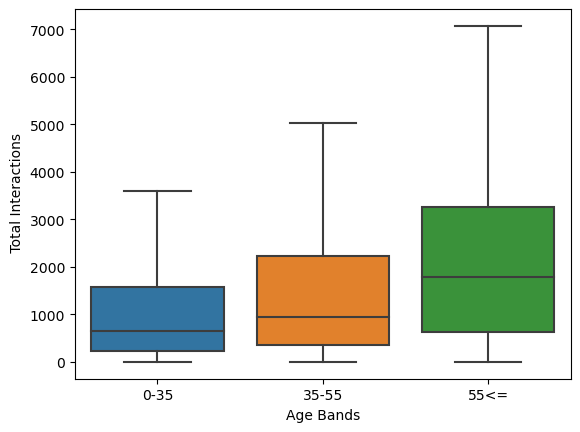

In [20]:
sort_ord = ["0-35","35-55","55<="]
sns.boxplot(x = 'age_band', y = 'sum_click', data = df_data,showfliers=False,order=sort_ord).set(xlabel="Age Bands" , ylabel=" Total Interactions")

In [19]:
df_data[['age_band','sum_click']].groupby("age_band").describe()

sum_click                                                         \
             count         mean          std  min    25%     50%      75%   
age_band                                                                    
0-35       20471.0  1201.510429  1521.919029  1.0  228.0   655.0  1576.00   
35-55       8552.0  1693.973807  2081.999565  1.0  359.0   956.5  2229.25   
55<=         205.0  2546.902439  2797.670747  2.0  639.0  1780.0  3271.00   

                   
              max  
age_band           
0-35      24139.0  
35-55     21123.0  
55<=      19126.0

In [20]:
df_data["highest_education"].unique().tolist()

['HE Qualification',
 'Lower Than A Level',
 'A Level or Equivalent',
 'Post Graduate Qualification',
 'No Formal quals']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'No Formal quals'),
  Text(1, 0, 'Lower Than A Level'),
  Text(2, 0, 'A Level or Equivalent'),
  Text(3, 0, 'HE Qualification'),
  Text(4, 0, 'Post Graduate Qualification')])

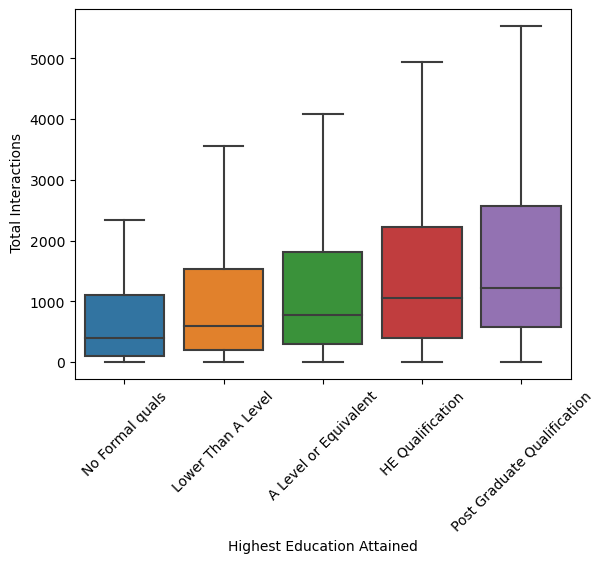

In [21]:
sotr_ord = ["No Formal quals","Lower Than A Level","A Level or Equivalent","HE Qualification","Post Graduate Qualification"]

sns.boxplot(x = 'highest_education', y = 'sum_click', data = df_data,showfliers=False,order = sotr_ord).set(xlabel="Highest Education Attained" , ylabel=" Total Interactions")
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.xticks(rotation = 45)

In [22]:
df_data[["final_result","sum_click"]].groupby("final_result").describe()

sum_click                                                 \
                 count         mean          std   min    25%     50%   
final_result                                                            
Distinction     3024.0  2666.758929  2409.992733  70.0  942.0  1896.0   
Fail            6678.0   688.359539   980.924693   1.0  124.0   353.0   
Pass           12358.0  1922.275287  1852.786958   4.0  683.0  1343.0   
Withdrawn       7168.0   444.821010   683.114524   1.0   70.0   221.5   

                                
                  75%      max  
final_result                    
Distinction   3765.00  18039.0  
Fail           838.75  11250.0  
Pass          2568.00  24139.0  
Withdrawn      551.00  12401.0

In [23]:
df_data["imd_band"].value_counts()

imd_band
20-30%     3205
30-40%     3193
10-20%     3038
40-50%     2915
50-60%     2850
0-10%      2829
60-70%     2658
70-80%     2628
80-90%     2507
90-100%    2351
?          1054
Name: count, dtype: int64

In [24]:
df_data[["final_result","imd_band"]].groupby(["final_result","imd_band"])["final_result"].count()

final_result  imd_band
Distinction   0-10%        168
              10-20%       191
              20-30%       263
              30-40%       315
              40-50%       293
              50-60%       297
              60-70%       299
              70-80%       313
              80-90%       328
              90-100%      358
              ?            199
Fail          0-10%        852
              10-20%       854
              20-30%       793
              30-40%       744
              40-50%       658
              50-60%       676
              60-70%       509
              70-80%       570
              80-90%       471
              90-100%      410
              ?            141
Pass          0-10%        996
              10-20%      1166
              20-30%      1226
              30-40%      1345
              40-50%      1224
              50-60%      1227
              60-70%      1209
              70-80%      1170
              80-90%      1164
              90

In [25]:
df_imd_grp = df_data[["final_result","imd_band"]].groupby(["final_result","imd_band"]).agg(imd_count = ("imd_band","count"))
df_imd_grp = df_imd_grp.reset_index() 

<Axes: xlabel='final_result', ylabel='imd_count'>

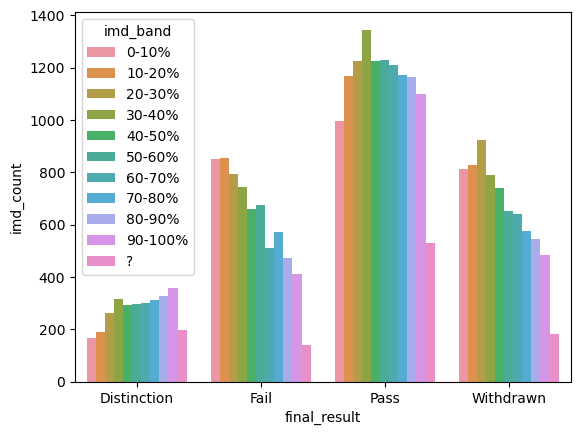

In [26]:

sns.barplot(x="final_result", 
           y="imd_count", 
           hue="imd_band", 
           data=df_imd_grp)


In [27]:
df_data_2 = df_data.copy()

In [28]:
df_data["final_result_val"] = df_data["final_result"].replace({"Pass":1,"Fail":0,"Withdrawn":0,"Distinction":1})

In [29]:
df_data["final_result_val"].value_counts()

final_result_val
1    15382
0    13846
Name: count, dtype: int64

In [30]:
df_data["final_result_val"].corr(df_data["sum_click"])

0.43387919773462075

In [31]:
df_data.nlargest(10,"sum_click")

,id_student,code_module,code_presentation,sum_click,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_result_val
430,80868,CCC,2014J,24139,M,South West Region,Lower Than A Level,80-90%,0-35,0,60,N,Pass,1
7776,517269,FFF,2013B,21123,M,Yorkshire Region,Lower Than A Level,0-10%,35-55,1,180,Y,Pass,1
17924,611417,CCC,2014J,20391,F,North Region,Lower Than A Level,?,35-55,0,60,N,Pass,1
3728,368315,FFF,2013J,19734,M,London Region,Lower Than A Level,30-40%,0-35,0,120,Y,Pass,1
13712,583487,FFF,2014J,19461,M,Scotland,Lower Than A Level,90-100%,35-55,0,60,N,Pass,1
21964,644361,FFF,2014J,19415,F,North Western Region,Lower Than A Level,40-50%,35-55,0,120,N,Pass,1
26057,898594,FFF,2013J,19126,F,West Midlands Region,HE Qualification,60-70%,55<=,0,60,N,Pass,1
11346,560431,FFF,2013B,18039,M,South West Region,A Level or Equivalent,70-80%,35-55,0,60,N,Distinction,1
20554,630905,FFF,2014J,17825,M,Wales,HE Qualification,50-60%,0-35,0,120,N,Distinction,1
18541,617580,FFF,2014J,17481,F,South Region,Lower Than A Level,40-50%,0-35,0,60,Y,Pass,1


# Grouping logic
 - ID_student can be dropped
 - Code_module Dummies
 - code presentation dummies as well, possible combo with Code_module
 - Gender, 1,0 or dummies,
 - Region, dummies
 - Highest education, dummies,
 - imd band, map to 0 for ? through to 10 to 100
 - age band, dummies
 - disability 1,0
 - drop final_result
 

In [32]:
#do label encoder for heat map and correlation
from sklearn import preprocessing

In [33]:
label_encoder = preprocessing.LabelEncoder()

In [34]:
df_data_copy = df_data.copy()

In [35]:
df_data_copy = df_data_copy.drop(["id_student","final_result"],axis = 1)

In [36]:
cols = df_data_copy.columns
print(cols)

Index(['code_module', 'code_presentation', 'sum_click', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result_val'],
      dtype='object')


In [37]:
for col in cols:
    if col == "num_of_prev_attempts" or col== "studied_credits" or col == "final_result_val" or col == "sum_click":
        pass
    else:
        df_data_copy[col]= label_encoder.fit_transform(df_data_copy[col])

In [38]:
df_data_copy.head()

,code_module,code_presentation,sum_click,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result_val
0,0,3,2791,1,6,1,8,2,0,60,0,1
1,3,1,646,1,3,1,3,2,0,90,0,0
2,3,3,10,1,3,1,3,2,1,60,0,0
3,0,1,934,1,0,1,9,2,0,240,0,1
4,1,0,161,0,0,2,2,0,2,60,0,0


In [39]:
df_data_copy_2 = df_data_copy.drop("sum_click",axis=1)

<Axes: >

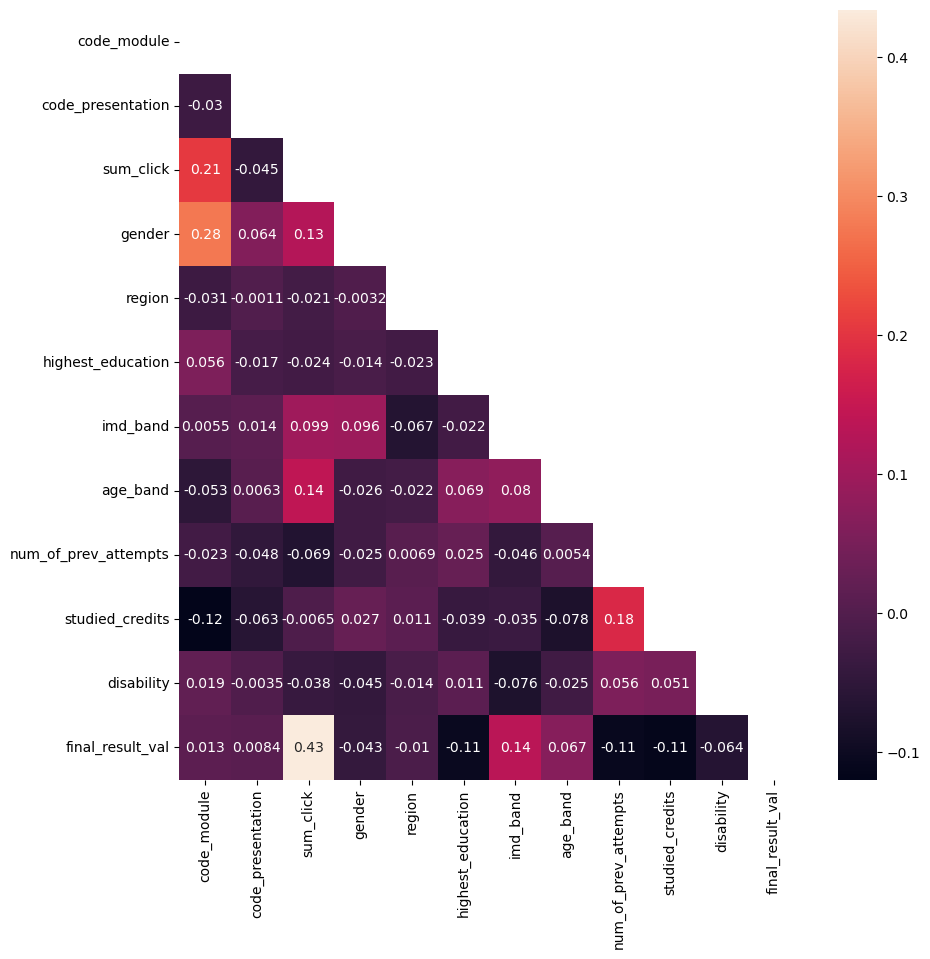

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(df_data_copy.corr()))
sns.heatmap(df_data_copy.corr(),mask = mask, annot = True)

In [41]:
from sklearn import model_selection

In [42]:
X = df_data_copy.drop("final_result_val",axis=1)
y = df_data_copy["final_result_val"]

In [43]:
X_train, X_test, y_train, y_test = model_selection.train_test_split( X, y, test_size=0.2, random_state=21)

In [44]:
from sklearn import neighbors

In [45]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
knn.predict_proba(X_test)

array([[0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       ...,
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2]])

In [48]:
knn.score(X_test,y_test)

0.7683886418063633

In [49]:
knn_scores = []
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_scores.append(knn.score(X_test,y_test))

In [50]:
print(knn_scores)

[0.7223742730071844, 0.700136845706466, 0.7524803284296955, 0.7417037290455012, 0.7683886418063633, 0.7601778994184057, 0.7742045843311666, 0.7707834416695176, 0.7795073554567226, 0.7716387273349299, 0.777796784125898, 0.7743756414642491, 0.7836127266507014, 0.7803626411221348, 0.7832706123845364, 0.7834416695176188, 0.7834416695176188, 0.7815600410537119, 0.7839548409168662, 0.7817310981867944, 0.7842969551830311, 0.7829284981183715, 0.7848101265822784, 0.7839548409168662, 0.7860075265138556, 0.7863496407800206, 0.7878891549777626, 0.7851522408484434, 0.7868628121792679, 0.7854943551146083, 0.7870338693123503, 0.7870338693123503, 0.7877180978446802, 0.7868628121792679, 0.7866917550461854, 0.7837837837837838, 0.7866917550461854, 0.7848101265822784, 0.7866917550461854, 0.7856654122476907, 0.788060212110845, 0.784639069449196, 0.7858364693807732, 0.784639069449196, 0.784639069449196, 0.7819021553198768, 0.7832706123845364, 0.7836127266507014, 0.7841258980499487]


In [51]:
print("Optimal KNN value is ", knn_scores.index(max(knn_scores))+1,max(knn_scores))

Optimal KNN value is  41 0.788060212110845


In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [53]:
knn = neighbors.KNeighborsClassifier(n_neighbors=41)
knn.fit(X_train,y_train)
predy = knn.predict(X_test)
target_names = ['Fail', 'Pass']
print(classification_report(y_test,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.8101    0.7165    0.7604      2744
        Pass     0.7724    0.8514    0.8100      3102

    accuracy                         0.7881      5846
   macro avg     0.7913    0.7839    0.7852      5846
weighted avg     0.7901    0.7881    0.7867      5846



In [54]:
from sklearn import tree

In [55]:
dec_tree = tree.DecisionTreeClassifier(random_state=0,max_depth = 100)

In [56]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=100, random_state=0)

In [57]:
dec_tree.score(X_test,y_test)

0.7505986999657885

In [58]:
dec_tree_score = []
for i in range(1,100):
    dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = i)
    dec_treel.fit(X_train,y_train)
    dec_tree_score.append(dec_treel.score(X_test,y_test))
    

In [59]:
print("Optimal DT value is ", dec_tree_score.index(max(dec_tree_score))+1,max(dec_tree_score))

Optimal DT value is  7 0.8205610673965105


In [60]:
dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = 7)
dec_treel.fit(X_train,y_train)
predy = dec_treel.predict(X_test)
target_names = ['Fail', 'Pass']
print(classification_report(y_test,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.8614    0.7362    0.7939      2744
        Pass     0.7932    0.8952    0.8411      3102

    accuracy                         0.8206      5846
   macro avg     0.8273    0.8157    0.8175      5846
weighted avg     0.8252    0.8206    0.8189      5846



In [61]:
from sklearn import naive_bayes

In [62]:
nb = naive_bayes.MultinomialNB()

In [63]:
nb.fit(X_train,y_train)

MultinomialNB()

In [64]:
nb.score(X_test,y_test)

0.7564146424905919

In [65]:

predy = nb.predict(X_test)
target_names = ['Fail', 'Pass']
print(classification_report(y_test,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.7021    0.8356    0.7631      2744
        Pass     0.8252    0.6863    0.7494      3102

    accuracy                         0.7564      5846
   macro avg     0.7636    0.7610    0.7562      5846
weighted avg     0.7674    0.7564    0.7558      5846



In [66]:
from sklearn import ensemble

In [67]:
rf = ensemble.RandomForestClassifier(random_state = 0)

In [68]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [69]:
rf.score(X_test,y_test)

0.8219295244611701

In [70]:
rfpred = rf.predict(X_test)

In [71]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=41)
clf2 = naive_bayes.MultinomialNB()
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth = 7)

In [72]:
eclf1 = ensemble.VotingClassifier(estimators=[
        ('knn', clf1), ('mnb', clf2), ('dt', clf3)], voting='hard')


In [73]:
eclf1.fit(X_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=41)),
                             ('mnb', MultinomialNB()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=7,
                                                     random_state=0))])

In [74]:
eclf1.score(X_test,y_test)

0.8037974683544303

In [75]:
predecl = eclf1.predict(X_test)

['code_module', 'code_presentation', 'sum_click', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result_val']

In [76]:
df_data_dum = df_data.copy()

In [77]:
dum_col =[] 
for col in df_data_dum.columns:
    dum_col.append(col)

In [78]:
dum_col.remove("num_of_prev_attempts")

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

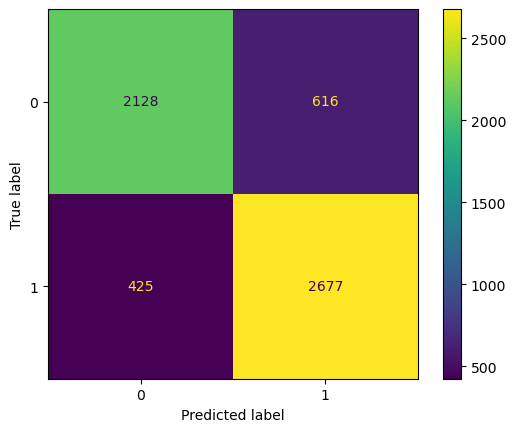

In [80]:
cm = confusion_matrix(y_test, rfpred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

plt.show()

In [81]:
target_names = ['Fail', 'Pass']
print(classification_report(y_test,rfpred,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.8335    0.7755    0.8035      2744
        Pass     0.8129    0.8630    0.8372      3102

    accuracy                         0.8219      5846
   macro avg     0.8232    0.8193    0.8203      5846
weighted avg     0.8226    0.8219    0.8214      5846



In [82]:

target_names = ['Fail', 'Pass']
print(classification_report(y_test,predecl,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.8042    0.7693    0.7864      2744
        Pass     0.8035    0.8343    0.8186      3102

    accuracy                         0.8038      5846
   macro avg     0.8038    0.8018    0.8025      5846
weighted avg     0.8038    0.8038    0.8035      5846



<Axes: xlabel='final_result', ylabel='imd_count'>

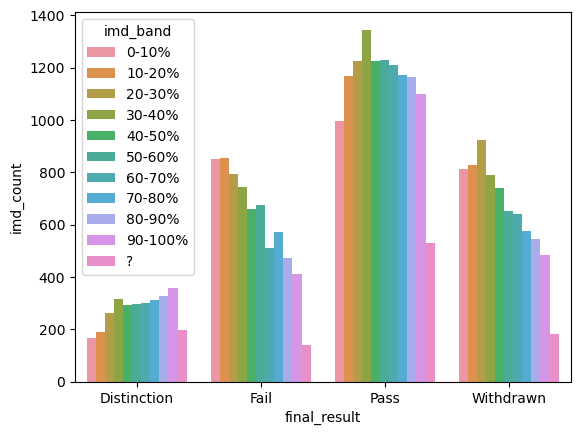

In [83]:
sns.barplot(x="final_result", 
           y="imd_count", 
           hue="imd_band", 
           data=df_imd_grp)

In [84]:
df_imd_grp = df_imd_grp[df_imd_grp.imd_band != "?"]

[Text(0.5, 0, 'Result'), Text(0, 0.5, 'Count of IMD')]

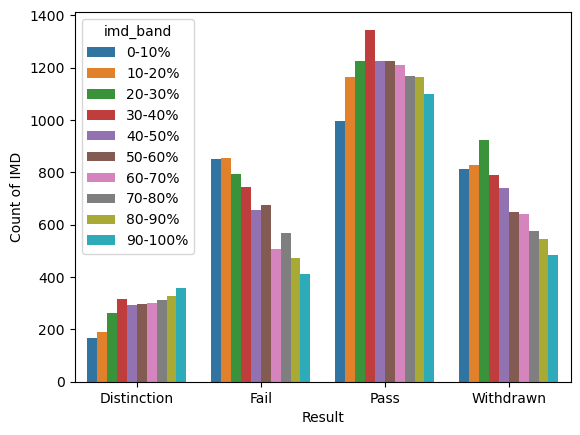

In [85]:
sns.barplot(x="final_result", 
           y="imd_count", 
           hue="imd_band", 
           data=df_imd_grp).set(xlabel="Result" , ylabel="Count of IMD")

In [86]:
df_data = df_data[df_data.imd_band != "?"]

In [87]:
cols = df_data["imd_band"].unique().tolist()
totals = df_data["imd_band"].value_counts().tolist()
print(cols)

['80-90%', '30-40%', '90-100%', '20-30%', '50-60%', '10-20%', '40-50%', '60-70%', '0-10%', '70-80%']


In [88]:
col_sort = ["0-10%","10-20%","20-30%","30-40%","40-50%","50-60%","60-70%","70-80%","80-90%","90-100%"]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

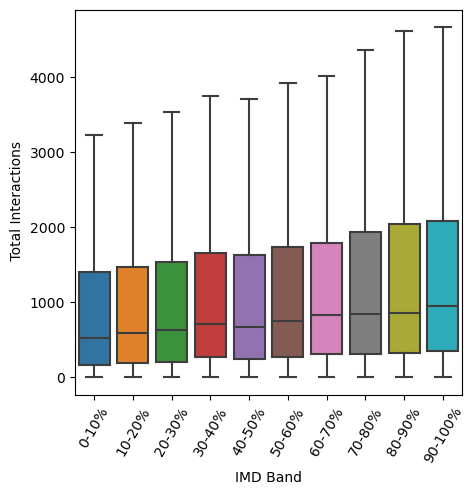

In [89]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x = 'imd_band', y = 'sum_click', data = df_data,showfliers=False,order = col_sort).set(xlabel="IMD Band" , ylabel=" Total Interactions")
plt.setp(ax.get_xticklabels(), rotation=60)

In [90]:
df_data_2["final_result_val"] = df_data_2["final_result"].replace({"Pass":1,"Fail":0,"Withdrawn":2,"Distinction":3})

In [91]:
df_data_2 = df_data_2.drop(["id_student","final_result"],axis = 1)
cols = df_data_2.columns
for col in cols:
    if col == "num_of_prev_attempts" or col== "studied_credits" or col == "final_result_val" or col == "sum_click":
        pass
    else:
        df_data_2[col]= label_encoder.fit_transform(df_data_2[col])

In [92]:
X2 = df_data_2.drop("final_result_val",axis=1)
y2 = df_data_2["final_result_val"]
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split( X2, y2, test_size=0.2, random_state=21)

In [93]:
rf.fit(X_train2,y_train2)

RandomForestClassifier(random_state=0)

In [94]:
rf.score(X_test2,y_test2)

0.5826205952788232

In [95]:
rfpred2 = rf.predict(X_test2)

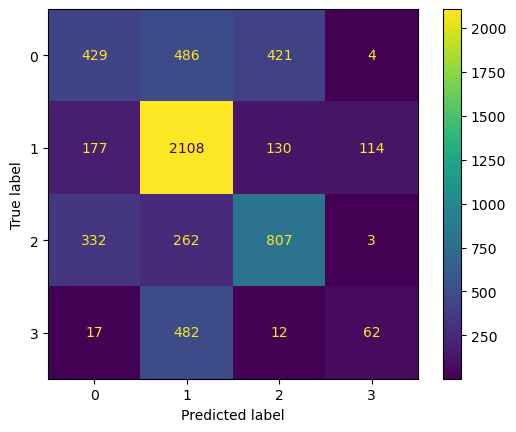

In [96]:
cm = confusion_matrix(y_test2, rfpred2, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

plt.show()

In [97]:
target_names = ['Fail', 'Pass','Withdrawn',"Distinction"]
print(classification_report(y_test2,rfpred2,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.4492    0.3201    0.3739      1340
        Pass     0.6315    0.8335    0.7186      2529
   Withdrawn     0.5891    0.5748    0.5818      1404
 Distinction     0.3388    0.1082    0.1640       573

    accuracy                         0.5826      5846
   macro avg     0.5021    0.4592    0.4596      5846
weighted avg     0.5508    0.5826    0.5524      5846



In [98]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [99]:
sm = SMOTE(random_state=21)
X_res, y_res = sm.fit_resample(X_train2, y_train2)

In [100]:
rf.fit(X_res,y_res)

RandomForestClassifier(random_state=0)

In [101]:
rf.score(X_test2,y_test2)

0.5318166267533356

In [102]:
rfpred3 = rf.predict(X_test2)

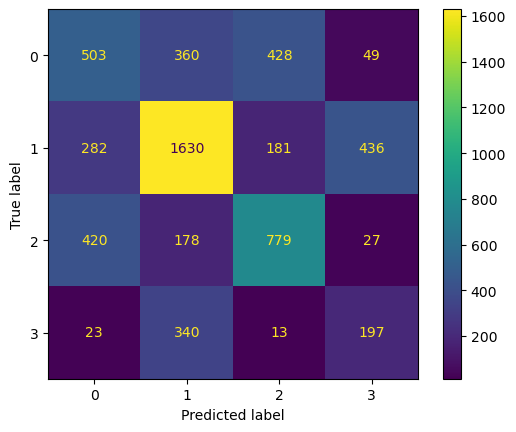

In [103]:
cm = confusion_matrix(y_test2, rfpred3, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

plt.show()

In [104]:
target_names = ['Fail', 'Pass','Withdrawn',"Distinction"]
print(classification_report(y_test2,rfpred3,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.4096    0.3754    0.3917      1340
        Pass     0.6499    0.6445    0.6472      2529
   Withdrawn     0.5560    0.5548    0.5554      1404
 Distinction     0.2779    0.3438    0.3073       573

    accuracy                         0.5318      5846
   macro avg     0.4734    0.4796    0.4754      5846
weighted avg     0.5358    0.5318    0.5333      5846



In [105]:
knn_scores = []
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_res,y_res)
    knn_scores.append(knn.score(X_test2,y_test2))
print("Optimal KNN value is ", knn_scores.index(max(knn_scores))+1,max(knn_scores))

knn = neighbors.KNeighborsClassifier(n_neighbors=knn_scores.index(max(knn_scores))+1)
knn.fit(X_res,y_res)
predy = knn.predict(X_test2)
target_names = ['Fail', 'Pass',"Withdrawn","Distinction"]
print(classification_report(y_test2,predy,target_names = target_names,digits = 4))

Optimal KNN value is  2 0.4295244611700308
              precision    recall  f1-score   support

        Fail     0.3126    0.4978    0.3840      1340
        Pass     0.5831    0.4951    0.5355      2529
   Withdrawn     0.4920    0.3298    0.3949      1404
 Distinction     0.2067    0.2251    0.2155       573

    accuracy                         0.4295      5846
   macro avg     0.3986    0.3869    0.3825      5846
weighted avg     0.4623    0.4295    0.4356      5846



In [106]:
dec_tree_score = []
for i in range(1,100):
    dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = i)
    dec_treel.fit(X_res,y_res)
    dec_tree_score.append(dec_treel.score(X_test2,y_test2))

dec_treel = tree.DecisionTreeClassifier(random_state=0,max_depth = dec_tree_score.index(max(dec_tree_score))+1)    

dec_treel.fit(X_res,y_res)
predy = dec_treel.predict(X_test2)
target_names = ['Fail', 'Pass',"Withdrawn","Distinction"]
print(classification_report(y_test2,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.4519    0.3157    0.3717      1340
        Pass     0.6484    0.6358    0.6420      2529
   Withdrawn     0.5925    0.6204    0.6061      1404
 Distinction     0.2677    0.4485    0.3353       573

    accuracy                         0.5404      5846
   macro avg     0.4901    0.5051    0.4888      5846
weighted avg     0.5526    0.5404    0.5414      5846



In [107]:
nbl = naive_bayes.MultinomialNB() 

nbl.fit(X_res,y_res)
predy = nbl.predict(X_test2)
target_names = ['Fail', 'Pass',"Withdrawn","Distinction"]
print(classification_report(y_test2,predy,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.2361    0.2090    0.2217      1340
        Pass     0.6335    0.3021    0.4091      2529
   Withdrawn     0.4608    0.7486    0.5704      1404
 Distinction     0.2174    0.4450    0.2921       573

    accuracy                         0.4020      5846
   macro avg     0.3869    0.4262    0.3733      5846
weighted avg     0.4601    0.4020    0.3934      5846



In [108]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=41)
clf2 = naive_bayes.MultinomialNB()
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth = 7)

eclf2 = ensemble.VotingClassifier(estimators=[
        ('knn', clf1), ('mnb', clf2), ('dt', clf3)], voting='hard')
eclf2.fit(X_res,y_res)
predecl = eclf2.predict(X_test2)

target_names = ['Fail', 'Pass',"Withdrawn","Distinction"]
print(classification_report(y_test2,predecl,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.3182    0.3448    0.3309      1340
        Pass     0.6472    0.4041    0.4976      2529
   Withdrawn     0.5344    0.6481    0.5858      1404
 Distinction     0.2401    0.4660    0.3169       573

    accuracy                         0.4552      5846
   macro avg     0.4350    0.4658    0.4328      5846
weighted avg     0.5048    0.4552    0.4629      5846



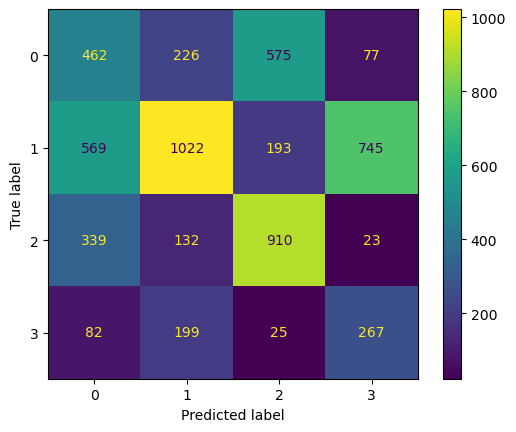

In [109]:
cm = confusion_matrix(y_test2, predecl, labels=eclf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=eclf2.classes_)
disp.plot()

plt.show()

<Axes: ylabel='count'>

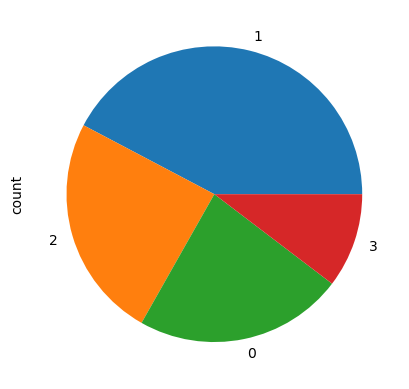

In [110]:
df_data_2["final_result_val"].value_counts(dropna=False).plot(kind="pie")

In [111]:
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest

In [112]:
score = 0
best = 0
cols2c = "a"
preds = "a"
for i in range(1,len(X2.columns)):
    skb = SelectKBest(k=i)
    skb.fit(X2, y2)
    skb.transform(X2)
    cols_skb = skb.get_feature_names_out()
    X_2catskb = pd.DataFrame(X2, columns = cols_skb)
    X2c_train, X2c_test, y2c_train, y2c_test = model_selection.train_test_split( X_2catskb, y2, test_size=0.2, random_state=21)
    rf.fit(X2c_train,y2c_train)
    tmpscr = rf.score(X2c_test,y2c_test)
    tmppred = rf.predict(X2c_test)
    if tmpscr > score:
        score = tmpscr
        best = i
        cols2c = cols_skb
        preds = tmppred

In [113]:
print("Best k fatures:",best," with a score: ",score,"% \n",cols2c)

Best k fatures: 9  with a score:  0.5596989394457749 % 
 ['code_module' 'code_presentation' 'sum_click' 'highest_education'
 'imd_band' 'age_band' 'num_of_prev_attempts' 'studied_credits'
 'disability']


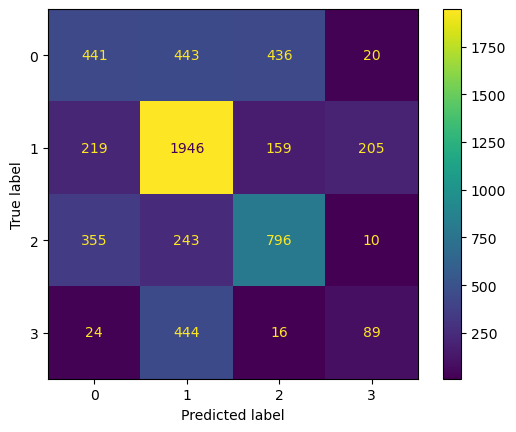

In [114]:

cm = confusion_matrix(y2c_test, preds, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

plt.show()

In [115]:
target_names = ['Fail', 'Pass',"Withdrawn","Distinction"]
print(classification_report(y2c_test,preds,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.4244    0.3291    0.3707      1340
        Pass     0.6326    0.7695    0.6944      2529
   Withdrawn     0.5657    0.5670    0.5663      1404
 Distinction     0.2747    0.1553    0.1984       573

    accuracy                         0.5597      5846
   macro avg     0.4744    0.4552    0.4575      5846
weighted avg     0.5338    0.5597    0.5408      5846



In [116]:
score = 0
best = 0
cols2c = "a"
preds = "a"
for i in range(1,len(X.columns)):
    skb = SelectKBest(k=i)
    skb.fit(X, y)
    skb.transform(X)
    cols_skb = skb.get_feature_names_out()
    X_2catskb = pd.DataFrame(X, columns = cols_skb)
    X2c_train, X2c_test, y2c_train, y2c_test = model_selection.train_test_split( X_2catskb, y, test_size=0.2, random_state=21)
    rf.fit(X2c_train,y2c_train)
    tmpscr = rf.score(X2c_test,y2c_test)
    tmppred = rf.predict(X2c_test)
    if tmpscr > score:
        score = tmpscr
        best = i
        cols2c = cols_skb
        preds = tmppred

In [117]:
print("Best k fatures:",best," with a score: ",score,"% \n",cols2c)

Best k fatures: 10  with a score:  0.8166267533356141 % 
 ['code_module' 'sum_click' 'gender' 'region' 'highest_education'
 'imd_band' 'age_band' 'num_of_prev_attempts' 'studied_credits'
 'disability']


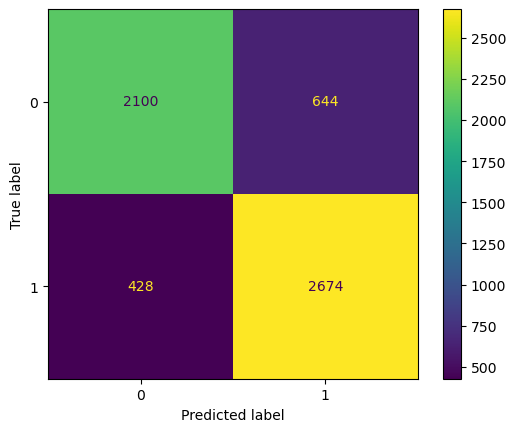

In [118]:

cm = confusion_matrix(y2c_test, preds, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

plt.show()

In [119]:
target_names = ['Fail', 'Pass']
print(classification_report(y2c_test,preds,target_names = target_names,digits = 4))

              precision    recall  f1-score   support

        Fail     0.8307    0.7653    0.7967      2744
        Pass     0.8059    0.8620    0.8330      3102

    accuracy                         0.8166      5846
   macro avg     0.8183    0.8137    0.8148      5846
weighted avg     0.8175    0.8166    0.8160      5846

